# QUELLE ÉVOLUTION DES RÉSERVATIONS AU BIBLIOBUS ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,date
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")

In [2]:
db_conn = DbConn().create_engine()

In [3]:
query= """SELECT reservedate,borrowernumber
FROM statdb.stat_reserves sr 
WHERE YEAR(reservedate) >= '2019'
AND branchcode ='BUS'"""

In [4]:
resas_zebre = pd.read_sql(query,db_conn)

In [5]:
df = EvolutionActivite(df=resas_zebre,df_subject='resas_zebre',text='réservations au bibliobus')

In [6]:
df.add_columns()

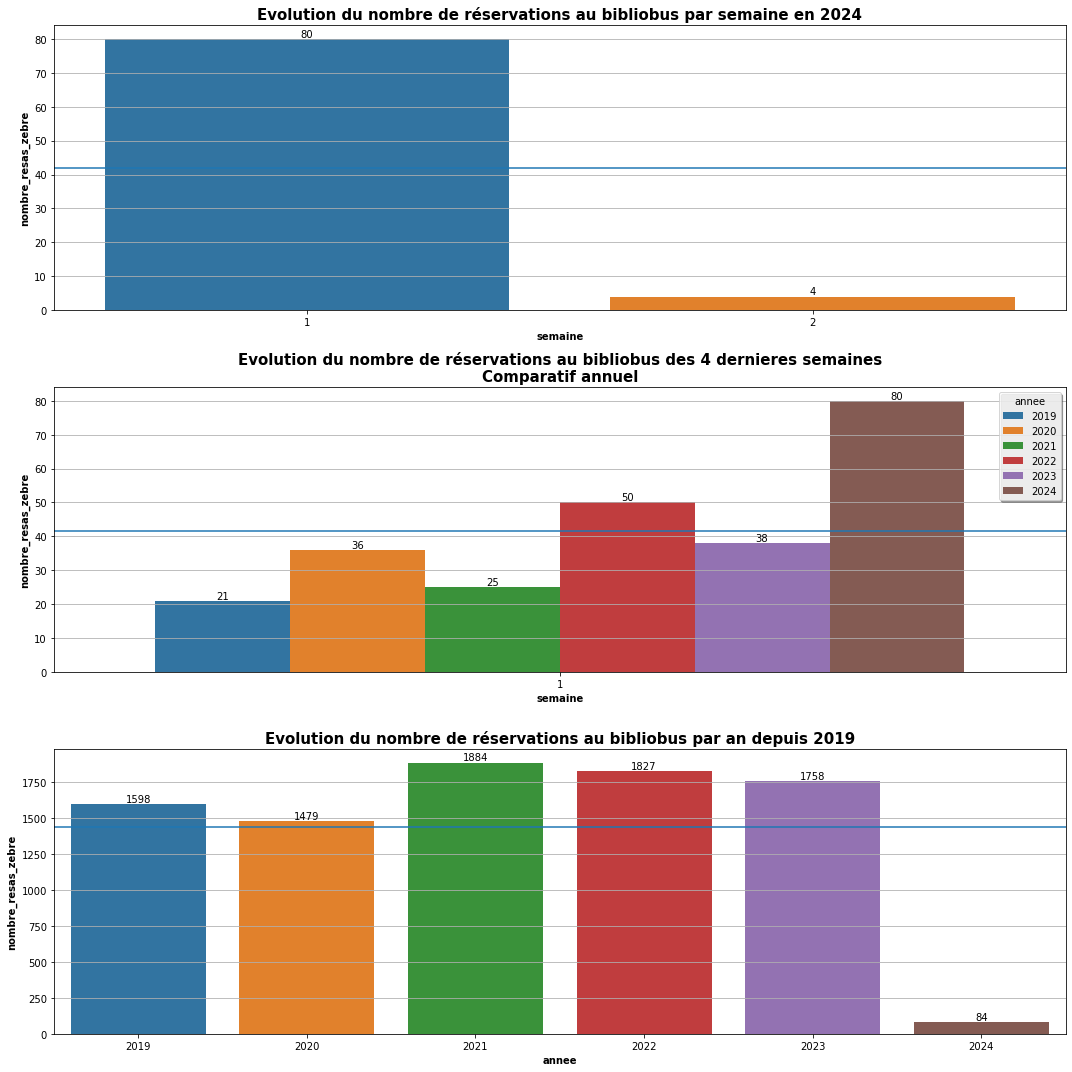

In [7]:
df1 = df.evolution_byweek_thisyear()
df2 = df.evolution_4lastweek()
df3 = df.evolution_by_year()
df4 = df.distinct_evolution_byweek_thisyear()
df5 = df.distinct_evolution_4lastweek()
df6 = df.distinct_evolution_by_year()
#Début des graphiques
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))
#1er graphique
sns.barplot(data=df1,x='semaine',y='nombre_resas_zebre',ax=ax[0])
ax[0].axhline(y=df1["nombre_resas_zebre"].mean())
ax[0].set_title(df.titre_graph1())
for i in ax[0].containers:
    ax[0].bar_label(i,)
#2e graphique
sns.barplot(data=df2,x='semaine',y='nombre_resas_zebre',hue='annee',ax=ax[1])
ax[1].axhline(y=df2["nombre_resas_zebre"].mean())
ax[1].set_title(df.titre_graph2())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    f
sns.barplot(data=df3,x='annee',y='nombre_resas_zebre',ax=ax[2])
ax[2].axhline(y=df3['nombre_resas_zebre'].mean())
ax[2].set_title(df.titre_graph3())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()

# Nombre de personnes distinctes

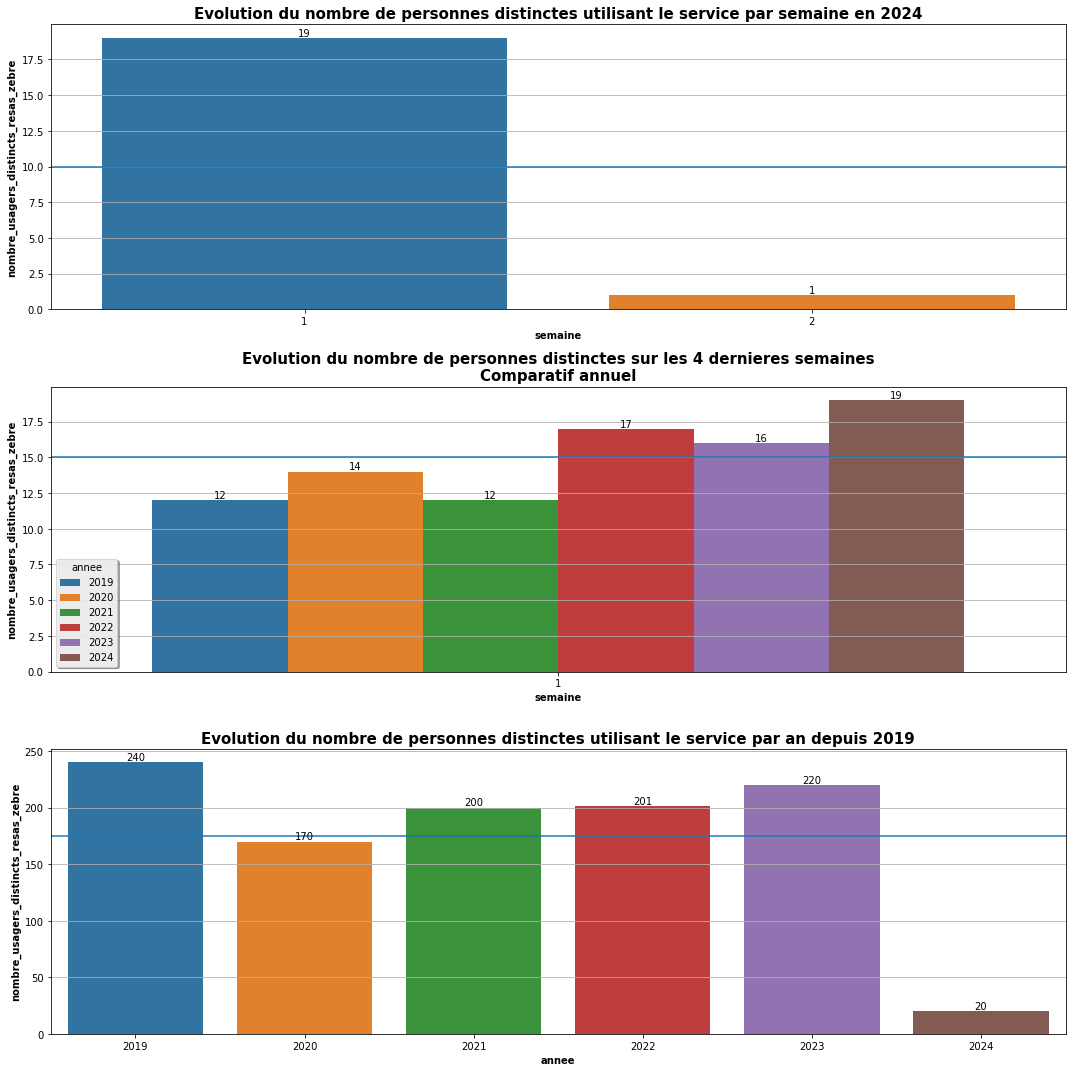

In [8]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))

sns.barplot(data=df4,x='semaine',y='nombre_usagers_distincts_resas_zebre',ax=ax[0])
ax[0].axhline(y=df4["nombre_usagers_distincts_resas_zebre"].mean())
ax[0].set_title(df.titre_graph4())
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(data=df5,x='semaine',y='nombre_usagers_distincts_resas_zebre',hue='annee',ax=ax[1])
ax[1].axhline(y=df5["nombre_usagers_distincts_resas_zebre"].mean())
ax[1].set_title(df.titre_graph5())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df6,x='annee',y='nombre_usagers_distincts_resas_zebre',ax=ax[2])
ax[2].axhline(y=df6["nombre_usagers_distincts_resas_zebre"].mean())
ax[2].set_title(df.titre_graph6())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()